<a href="https://colab.research.google.com/github/HadeelNasasrah/Prediction-of-Product-Sales/blob/main/Project_1_Part_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will continue to work on our sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales. The target is Item_Outlet_Sales

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import required packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# filepath after cleaning
filepath="/content/drive/MyDrive/Data science&AI/CodingDojo/01-Fundamentals/Week03/Data/df_befor_handling_missing.csv"
df_sales_predictions = pd.read_csv(filepath)

In [4]:
df_sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Retail_Price,Outlet_Identifier,Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,1.0,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,3.0,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,1.0,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,3.0,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,3.0,Supermarket Type1,994.7052


In [11]:
df_sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           7060 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Retail_Price          8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Establishment_Year    8523 non-null   int64  
 8   Outlet_Size           6113 non-null   object 
 9   Outlet_Location_Type  8523 non-null   float64
 10  Outlet_Type           8523 non-null   object 
 11  Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 799.2+ KB


In [5]:
#I want to make sure that I am working on the correct data set that contains missing values
df_sales_predictions.isna().sum()

Item_Identifier            0
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Retail_Price               0
Outlet_Identifier          0
Establishment_Year         0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

In [6]:
description = df_sales_predictions.describe().round(2)
description

,Item_Weight,Item_Visibility,Retail_Price,Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2.11,2181.29
std,4.64,0.05,62.28,8.37,0.81,1706.50
min,4.56,0.00,31.29,1985.00,1.00,33.29
25%,8.77,0.03,93.83,1987.00,1.00,834.25
50%,12.60,0.05,143.01,1999.00,2.00,1794.33
75%,16.85,0.09,185.64,2004.00,3.00,3101.30
max,21.35,0.33,266.89,2009.00,3.00,13086.96


##***Relationship Between Categorical Features And Target***##



---


**Here we will write a custom function for exploring the relationship between
categorical features and the target.**

In [25]:
# This function makes it easier for us to know the relationship between categorical features and the target
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                 order=order, hue_order=order, legend=False,
                 edgecolor='white', linewidth=0.5,
                 size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

###***Item_Fat_Content***###
 - ***Whether the product is low-fat or regular***

>  To explore the relationship between Item_Fat_Content and the target(Item_Outlet_Sales)





<ipython-input-20-2ed990e851e3>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


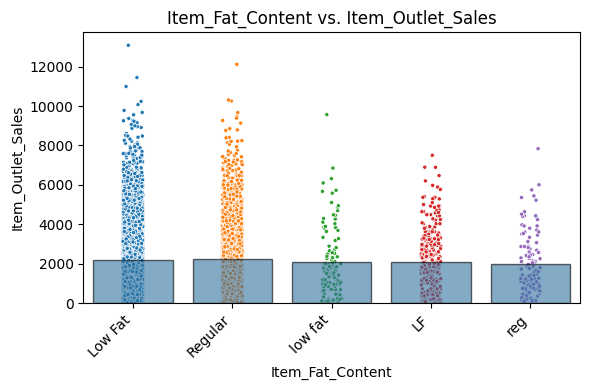

In [21]:
fig, ax = plot_categorical_vs_target(df_sales_predictions, x='Item_Fat_Content', fillna=False, order=None)


###***Item_Type***###
 - ***The category to which the product belongs***

>  To explore the relationship between Item_Type and the target(Item_Outlet_Sales)

<ipython-input-25-75af780dd1c4>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


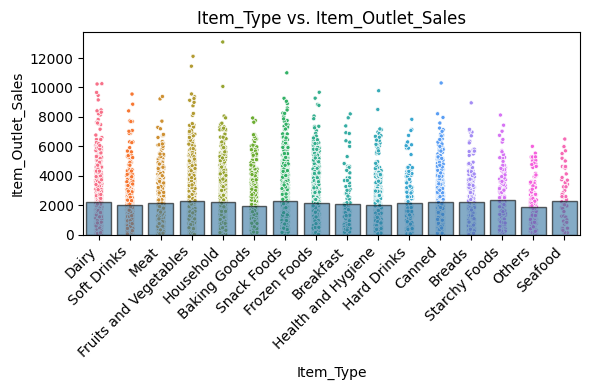

In [26]:
fig, ax = plot_categorical_vs_target(df_sales_predictions, x='Item_Type', fillna=False, order=None)

###***Outlet_Identifier***###
 - ***Store ID***

>  To explore the relationship between Outlet_Identifier and the target(Item_Outlet_Sales)

<ipython-input-25-75af780dd1c4>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


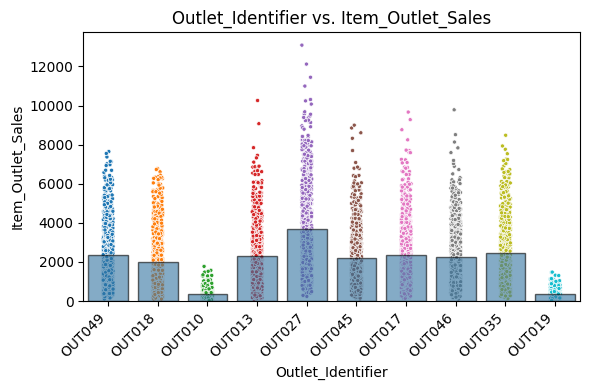

In [27]:
fig, ax = plot_categorical_vs_target(df_sales_predictions, x='Outlet_Identifier', fillna=False, order=None)

###***Outlet_Size***###
 - ***The size of the store in terms of ground area covered***

>  To explore the relationship between Outlet_Size and the target(Item_Outlet_Sales)

<ipython-input-25-75af780dd1c4>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


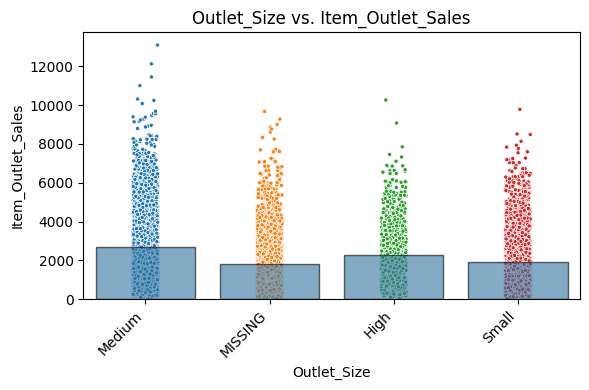

In [29]:
## With our function we will fill in the missing values in the Outlet_Size column
fig, ax = plot_categorical_vs_target(df_sales_predictions, x='Outlet_Size', fillna=True, order=None)

###***Outlet_Type***###
 - ***Whether the outlet is a grocery store or some sort of supermarket***

>  To explore the relationship between Outlet_Type and the target(Item_Outlet_Sales)

<ipython-input-25-75af780dd1c4>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


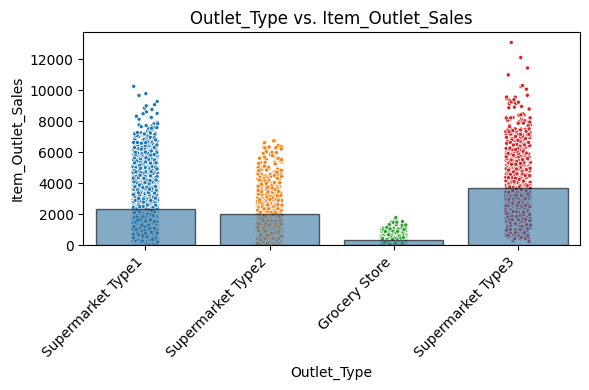

In [31]:
## With our function we will fill in the missing values in the Outlet_Size column
fig, ax = plot_categorical_vs_target(df_sales_predictions, x='Outlet_Type', fillna=False, order=None)

##***Relationship Between Numerical Features And Target***##

In [38]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count}")
  return fig, ax

###***Item_Weight***###
 - ***Weight of product***

>  To explore the relationship between  Item_Weight  and the target(Item_Outlet_Sales)

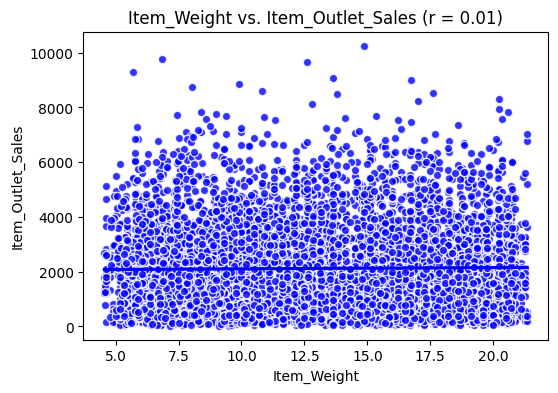

- NaN's Found: 1463


In [41]:
# function with a kwarg from the regplot function
fig, ax = plot_numeric_vs_target(df_sales_predictions, "Item_Weight", color = 'blue')

###***Item_Visibility***###
 - ***The percentage of total display area of all products in a store allocated to the particular product***

>  To explore the relationship between  Item_Visibility  and the target(Item_Outlet_Sales)

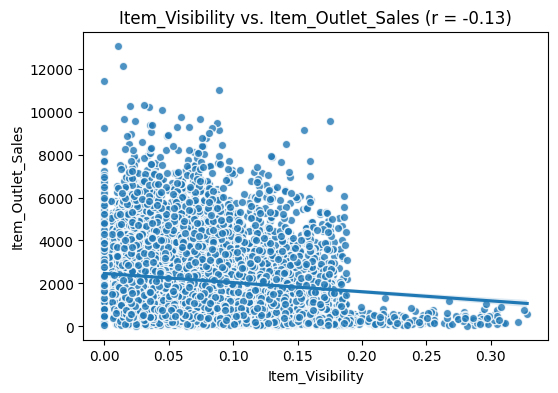

- NaN's Found: 0


In [43]:
fig, ax = plot_numeric_vs_target(df_sales_predictions, "Item_Visibility")

###***Retail_Price***###


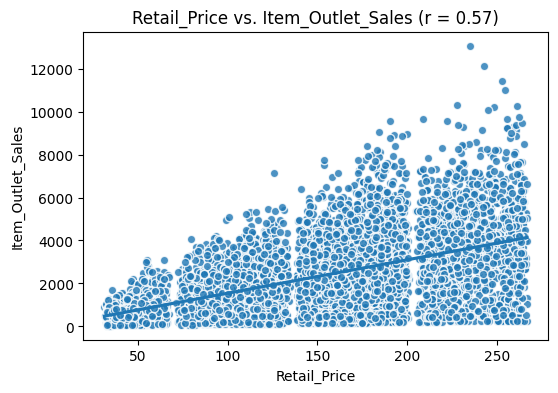

- NaN's Found: 0


In [44]:
fig, ax = plot_numeric_vs_target(df_sales_predictions, "Retail_Price")

###***Establishment_Year***###
 - ***The year in which store was established***

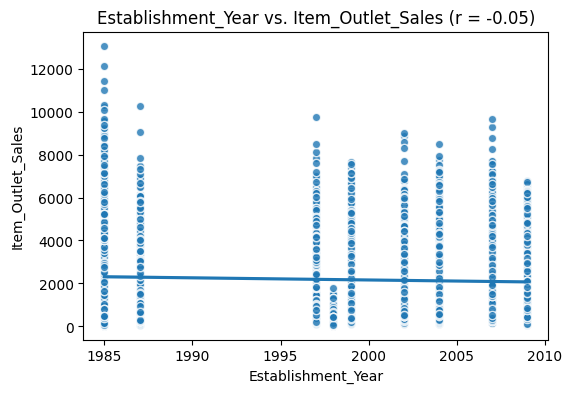

- NaN's Found: 0


In [45]:
fig, ax = plot_numeric_vs_target(df_sales_predictions, "Establishment_Year")

###***Outlet_Location_Type***###
 - ***The type of area in which the store is located***

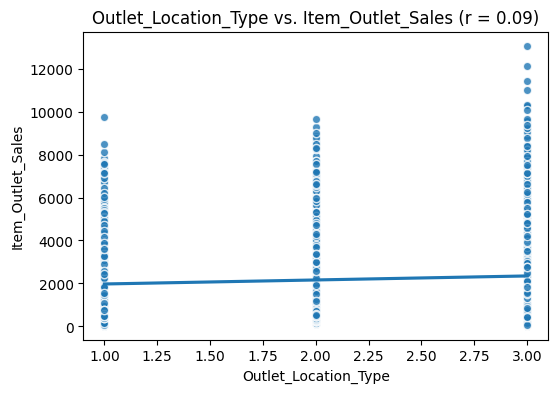

- NaN's Found: 0


In [46]:
fig, ax = plot_numeric_vs_target(df_sales_predictions, "Outlet_Location_Type")